In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
mdata=pd.read_csv('matches.csv')

In [3]:
mdata.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

There are Null values of city , player_of_match, winner , result_margin target_ runs , target_overs, method 

Now optimising the dataset .


In [5]:
city_null_data=mdata[mdata['city'].isnull()]

In [6]:
city_null_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi


In [7]:
sharjah_null_index=city_null_data[city_null_data['venue'].str.startswith('Sharjah')].index

In [8]:
mdata.loc[sharjah_null_index,'city']='Sharjah'

In [9]:
mdata.iloc[sharjah_null_index,:]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,Sharjah,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
404,729291,2014,Sharjah,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,Sharjah,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
408,729299,2014,Sharjah,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
413,729309,2014,Sharjah,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
414,729311,2014,Sharjah,2014-04-27,League,DR Smith,Sharjah Cricket Stadium,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,wickets,5.0,146.0,20.0,N,NaN,AK Chaudhary,VA Kulkarni
759,1216496,2020/21,Sharjah,2020-09-22,League,SV Samson,Sharjah Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,Rajasthan Royals,runs,16.0,217.0,20.0,N,NaN,C Shamshuddin,VA Kulkarni
764,1216527,2020/21,Sharjah,2020-09-27,League,SV Samson,Sharjah Cricket Stadium,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,224.0,20.0,N,NaN,RK Illingworth,K Srinivasan
771,1216515,2020/21,Sharjah,2020-10-03,League,SS Iyer,Sharjah Cricket Stadium,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,Delhi Capitals,runs,18.0,229.0,20.0,N,NaN,VA Kulkarni,RK Illingworth
773,1216538,2020/21,Sharjah,2020-10-04,League,TA Boult,Sharjah Cricket Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,runs,34.0,209.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth


In [10]:
dubai_null_index=city_null_data[city_null_data['venue'].str.startswith('Dubai International')].index

In [11]:
mdata.loc[dubai_null_index,'city']='Dubai'

In [12]:
mdata.loc[dubai_null_index,:]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
402,729287,2014,Dubai,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,Dubai,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
407,729297,2014,Dubai,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
409,729301,2014,Dubai,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,Dubai,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
415,729313,2014,Dubai,2014-04-28,League,Sandeep Sharma,Dubai International Cricket Stadium,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,wickets,5.0,125.0,20.0,N,NaN,BF Bowden,S Ravi
417,729317,2014,Dubai,2014-04-30,League,B Kumar,Dubai International Cricket Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,field,Sunrisers Hyderabad,runs,15.0,173.0,20.0,N,NaN,HDPK Dharmasena,M Erasmus
757,1216493,2020/21,Dubai,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.0,20.0,Y,NaN,AK Chaudhary,Nitin Menon
758,1216534,2020/21,Dubai,2020-09-21,League,YS Chahal,Dubai International Cricket Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Royal Challengers Bangalore,runs,10.0,164.0,20.0,N,NaN,AY Dandekar,Nitin Menon
761,1216510,2020/21,Dubai,2020-09-24,League,KL Rahul,Dubai International Cricket Stadium,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kings XI Punjab,runs,97.0,207.0,20.0,N,NaN,AK Chaudhary,PR Reiffel


In [13]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

This solves the city null values as it had been replaced by its original city played .

Now lets get into the player_0f_match column

In [14]:
mdata[mdata['player_of_match'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


Since there is possiblity that none can be player of match so best solution is to leave it or replace it with none.

In [15]:
mdata['player_of_match'].fillna('None',inplace=True)

/tmp/ipykernel_2404237/2853345256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdata['player_of_match'].fillna('None',inplace=True)


In [16]:
mdata.info

<bound method DataFrame.info of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

       

There are common problems with the null value of player_of_match , winner,target_runs,target_over.....

The problem with the na values of player_of_match index values it may either be corroupt data or it may be either due to weather or any condition .

The best solution fitted for it is to be deleted due to it's unevenness .

In [17]:
mdata[mdata['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,None,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,None,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,None,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,None,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,None,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [18]:
mdata['winner'].dropna(inplace=True)


In [19]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

I don't know why but i am unable to drop the na rows so gonna try for alternate .

In [20]:
cdata_index=mdata[mdata['winner'].isna()].index

In [21]:
mdata.drop(cdata_index,inplace=True)

In [22]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1090 non-null   int64  
 1   season           1090 non-null   object 
 2   city             1090 non-null   object 
 3   date             1090 non-null   object 
 4   match_type       1090 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1090 non-null   object 
 7   team1            1090 non-null   object 
 8   team2            1090 non-null   object 
 9   toss_winner      1090 non-null   object 
 10  toss_decision    1090 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1090 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1090 non-null   float64
 15  target_overs     1090 non-null   float64
 16  super_over       1090 non-null   object 
 17  method           21

Now it is good .

Lets see result_margin now.

In [23]:
mdata[mdata['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,2019,Delhi,2019-03-30,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,NaN,186.0,20.0,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,2019,Mumbai,2019-05-02,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,163.0,20.0,Y,NaN,CK Nandan,S Ravi
757,1216493,2020/21,Dubai,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.0,20.0,Y,NaN,AK Chaudhary,Nitin Menon


Since all the matches are tie so result_margin is null that is true as no margin can be provided in case of a tie.

Gonna replace with 0 .

In [24]:
cdata=mdata[mdata['result_margin'].isna()]

In [25]:
cdata.fillna(0,inplace=True)

/tmp/ipykernel_2404237/886651601.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdata.fillna(0,inplace=True)
/tmp/ipykernel_2404237/886651601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata.fillna(0,inplace=True)


In [26]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1090 non-null   int64  
 1   season           1090 non-null   object 
 2   city             1090 non-null   object 
 3   date             1090 non-null   object 
 4   match_type       1090 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1090 non-null   object 
 7   team1            1090 non-null   object 
 8   team2            1090 non-null   object 
 9   toss_winner      1090 non-null   object 
 10  toss_decision    1090 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1090 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1090 non-null   float64
 15  target_overs     1090 non-null   float64
 16  super_over       1090 non-null   object 
 17  method           21

Don't know what is the problem with inplace as i am not getting it right most probably i suppose.

Alternate way!

In [27]:
cdata=mdata['result_margin'].isna().index

In [28]:
cdata

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094],
      dtype='int64', length=1090)

In [29]:
mdata.loc[cdata,'result_margin']=0

THis solves the result margin null values 


In [30]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1090 non-null   int64  
 1   season           1090 non-null   object 
 2   city             1090 non-null   object 
 3   date             1090 non-null   object 
 4   match_type       1090 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1090 non-null   object 
 7   team1            1090 non-null   object 
 8   team2            1090 non-null   object 
 9   toss_winner      1090 non-null   object 
 10  toss_decision    1090 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1090 non-null   object 
 13  result_margin    1090 non-null   float64
 14  target_runs      1090 non-null   float64
 15  target_overs     1090 non-null   float64
 16  super_over       1090 non-null   object 
 17  method           21

In [31]:
mdata[mdata['method'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,0.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,0.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,0.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,0.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,0.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


There are too many nulls of method lets see what are the methods input


In [32]:
mdata['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

There are 21 DLS that means all other are non DLS means normal, so Null should be good fitting



In [33]:
mdata['method'].fillna('None',inplace=True)

/tmp/ipykernel_2404237/3416667024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdata['method'].fillna('None',inplace=True)


In [34]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1090 non-null   int64  
 1   season           1090 non-null   object 
 2   city             1090 non-null   object 
 3   date             1090 non-null   object 
 4   match_type       1090 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1090 non-null   object 
 7   team1            1090 non-null   object 
 8   team2            1090 non-null   object 
 9   toss_winner      1090 non-null   object 
 10  toss_decision    1090 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1090 non-null   object 
 13  result_margin    1090 non-null   float64
 14  target_runs      1090 non-null   float64
 15  target_overs     1090 non-null   float64
 16  super_over       1090 non-null   object 
 17  method           10

It is to be noted that the data is not fully optimized like Delhi Capitals and Delhi Daredevils and some other too has been merged.(Observed Later )

There names had been changed through the course of time so lets set mapping first.

In [35]:
team_mapping={
    'Delhi Daredevils':'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant':'Rising Pune Supergiants',
    'Kings XI Punjab' : 'Punjab Kings'
}
mdata['team1']=mdata['team1'].replace(team_mapping)
mdata['team2']=mdata['team2'].replace(team_mapping)
mdata['toss_winner']=mdata['toss_winner'].replace(team_mapping)
mdata['winner']=mdata['winner'].replace(team_mapping)

Hence now our data is optimized and well arranged 

Now it's time for insight visuals

In [36]:
mdata.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,241.0,20.0,N,None,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,0.0,130.0,20.0,N,None,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.0,166.0,20.0,N,None,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.0,111.0,20.0,N,None,BF Bowden,K Hariharan


Lets start with the most winning team in ipl.

In [37]:
pdata=mdata['winner'].value_counts(ascending=False).head(10)
pdata

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Name: count, dtype: int64

Text(0, 0.5, 'Team')

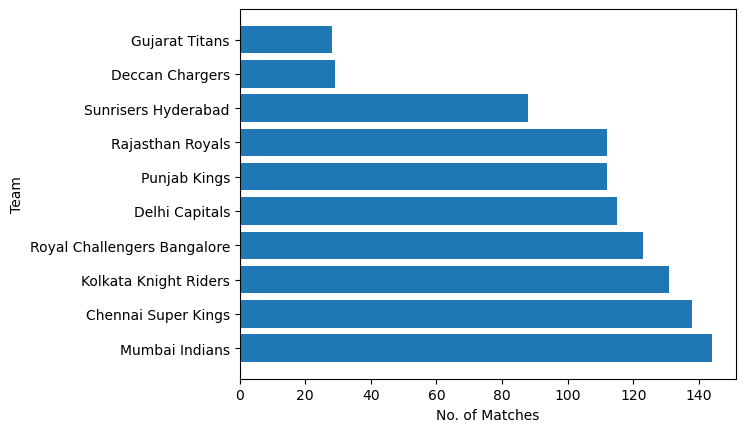

In [38]:
plt.barh(pdata.index,pdata.values)
plt.xlabel('No. of Matches')
plt.ylabel('Team')

Clearly the top 10 are represented above.

In [39]:
mdata.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,241.0,20.0,N,None,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,0.0,130.0,20.0,N,None,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.0,166.0,20.0,N,None,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.0,111.0,20.0,N,None,BF Bowden,K Hariharan




Toss_decision Analysis with number of time it was won / lost.



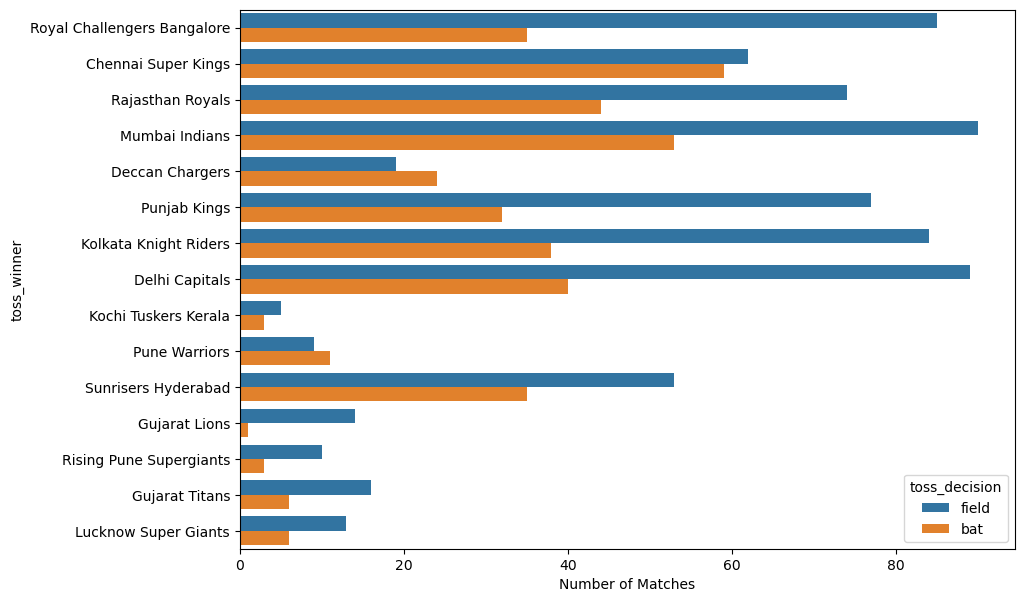

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data=mdata,y='toss_winner',hue='toss_decision')
plt.xlabel('Number of Matches')
plt.show()

<font size='3'>The above analysis explains that what is the probability of winning if the team choose to bat / field .</font>

Like whenever RCB chooses to fielding there is more chance to win that match.

In [41]:
mdata.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,241.0,20.0,N,None,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,0.0,130.0,20.0,N,None,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.0,166.0,20.0,N,None,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.0,111.0,20.0,N,None,BF Bowden,K Hariharan


In [42]:
mdata.sort_values('date',inplace=True)

In [44]:
final_win_indx=(mdata[mdata['match_type']=='Final']).index

In [45]:
s_data=mdata.loc[final_win_indx,:]
s_data

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,0.0,164.0,20.0,N,None,BF Bowden,RE Koertzen
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,Deccan Chargers,runs,0.0,144.0,20.0,N,None,RE Koertzen,SJA Taufel
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr DY Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,169.0,20.0,N,None,RE Koertzen,SJA Taufel
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,206.0,20.0,N,None,Asad Rauf,SJA Taufel
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,0.0,191.0,20.0,N,None,BF Bowden,SJA Taufel
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,0.0,149.0,20.0,N,None,HDPK Dharmasena,SJA Taufel
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,0.0,200.0,20.0,N,None,HDPK Dharmasena,BNJ Oxenford
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,0.0,203.0,20.0,N,None,HDPK Dharmasena,RK Illingworth
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,0.0,209.0,20.0,N,None,HDPK Dharmasena,BNJ Oxenford
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,0.0,130.0,20.0,N,None,NJ Llong,S Ravi


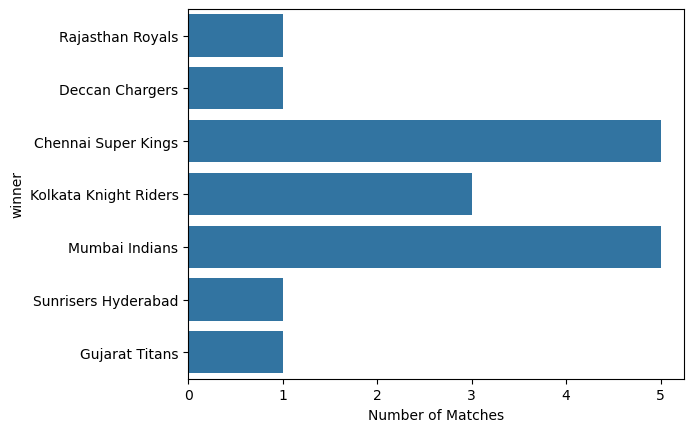

In [46]:
sns.countplot(data=s_data,y='winner')
plt.xlabel('Number of Matches')
plt.show()

<font size='3'>This shows that in 17 years CSK and MI got 5 cups followed by KKR and other teams.</font>



# Now lets analyse matches won by chasing or defending of teams.

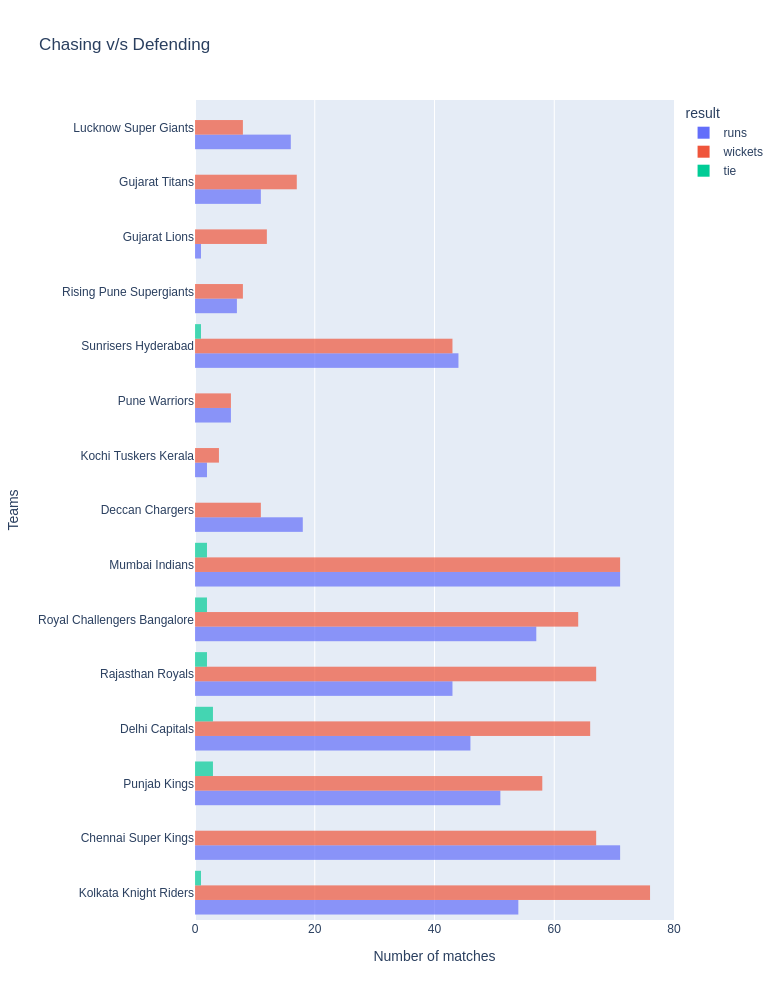

In [47]:
fig=px.histogram(
    mdata,y='winner',color='result',opacity=0.7,title='Chasing v/s Defending',barmode='group',height=1000)
fig.update_layout(
    yaxis_title='Teams',
    xaxis_title='Number of matches')
fig.show()

# Chasing v/s Defending

This clarifies that KKR has most successful defending and CSK has most successful chasing and MI is the best overall team for chasing and defending as well.

In [48]:
mdata.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.0,241.0,20.0,N,None,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,0.0,130.0,20.0,N,None,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.0,166.0,20.0,N,None,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.0,111.0,20.0,N,None,BF Bowden,K Hariharan


In [49]:
mdata['date']=mdata['date'].astype(str)

In [75]:
gdata=mdata.groupby(['winner','venue']).size().reset_index(name='wins')
print(gdata)

                  winner                             venue  wins
0    Chennai Super Kings              Arun Jaitley Stadium     1
1    Chennai Super Kings       Arun Jaitley Stadium, Delhi     2
2    Chennai Super Kings                 Brabourne Stadium     1
3    Chennai Super Kings                      Buffalo Park     1
4    Chennai Super Kings             De Beers Diamond Oval     1
..                   ...                               ...   ...
364  Sunrisers Hyderabad           Sharjah Cricket Stadium     2
365  Sunrisers Hyderabad              Sheikh Zayed Stadium     2
366  Sunrisers Hyderabad                  Wankhede Stadium     1
367  Sunrisers Hyderabad          Wankhede Stadium, Mumbai     1
368  Sunrisers Hyderabad  Zayed Cricket Stadium, Abu Dhabi     1

[369 rows x 3 columns]


In [80]:
hdata=gdata.pivot(index='winner',columns='venue',values='wins')
hdata

venue,Arun Jaitley Stadium,"Arun Jaitley Stadium, Delhi",Barabati Stadium,"Barsapara Cricket Stadium, Guwahati","Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",Brabourne Stadium,"Brabourne Stadium, Mumbai",Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,...,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,"Vidarbha Cricket Association Stadium, Jamtha",Wankhede Stadium,"Wankhede Stadium, Mumbai","Zayed Cricket Stadium, Abu Dhabi"
winner,,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,3.0,...,NaN,3.0,3.0,2.0,1.0,2.0,NaN,7.0,6.0,1.0
Deccan Chargers,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,NaN,NaN
Delhi Capitals,8.0,6.0,NaN,NaN,1.0,NaN,4.0,1.0,NaN,1.0,...,4.0,5.0,2.0,1.0,1.0,2.0,NaN,3.0,3.0,1.0
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Gujarat Titans,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Kochi Tuskers Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Kolkata Knight Riders,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,...,NaN,5.0,6.0,NaN,3.0,1.0,NaN,1.0,4.0,2.0
Lucknow Super Giants,NaN,NaN,NaN,NaN,7.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Mumbai Indians,1.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,NaN,5.0,...,NaN,3.0,6.0,2.0,2.0,1.0,NaN,42.0,10.0,2.0


# Heatmap of teams vs venue 


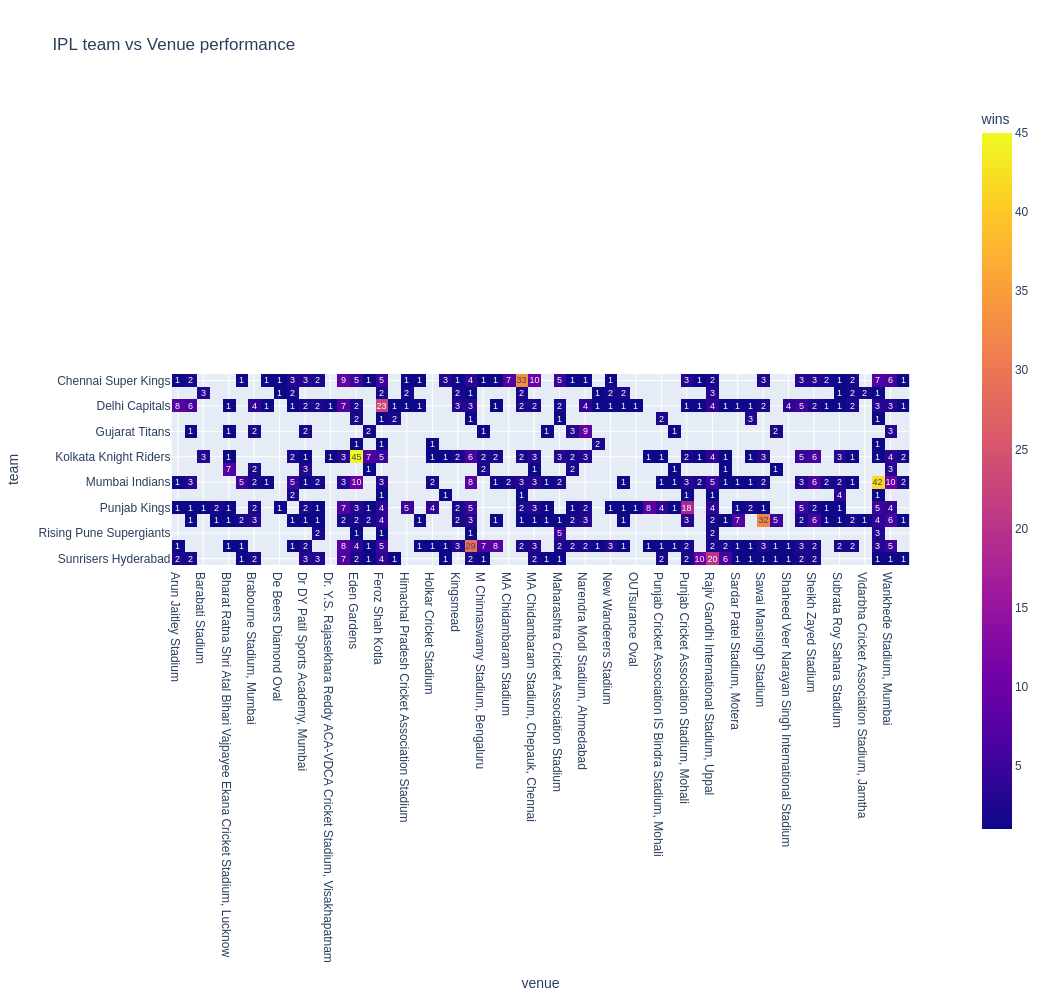

In [81]:
fig=px.imshow(
    hdata,text_auto=True,labels=dict(x='venue',y='team',color='wins'),
    title='IPL team vs Venue performance',width=1000,height=1000)

fig.show()